In [1]:
import os
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

from algorithms.decomposition import LDA, PCA, KernelPCA, FactorAnalysis

%matplotlib inline

### Iris dataset

In [2]:
if not os.path.isdir("./data"):
    os.mkdir("./data")

if not os.path.isfile("./data/iris.txt"):
    # downloading data
    !wget -O data/iris.txt "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
else:    
    # reading data in pandas
    iris = pd.read_csv("./data/iris.txt", sep=",", header=None, names=["x1", "x2", "x3", "x4", "target"])
    iris.replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}, inplace=True)

# pandas dataframe to numpy array
iris = iris.as_matrix()
X = iris[:,:-1]
y = iris[:,-1]

Let's compare 3 commonly used algorithms:
 - Linear Discriminant Analysis (LDA);
 - Principal Component Analysis (PCA);
 - Kernel PCA;
 - Factor Analysis.

In [3]:
# PCA
pca = PCA(normalize=True)
pca.fit(X)
X_pca = pca.transform(X, dims=2)

# Kernel PCA
kpca = KernelPCA()
kpca.fit(X)
X_kpca = kpca.transform(dims=2)

# LDA
lda = LDA()
lda.fit(X,y)
X_lda = lda.transform(X, dims=2)

# Factor Analysis
fa = FactorAnalysis()
X_fa = fa.fit_transform(X, dim=2)

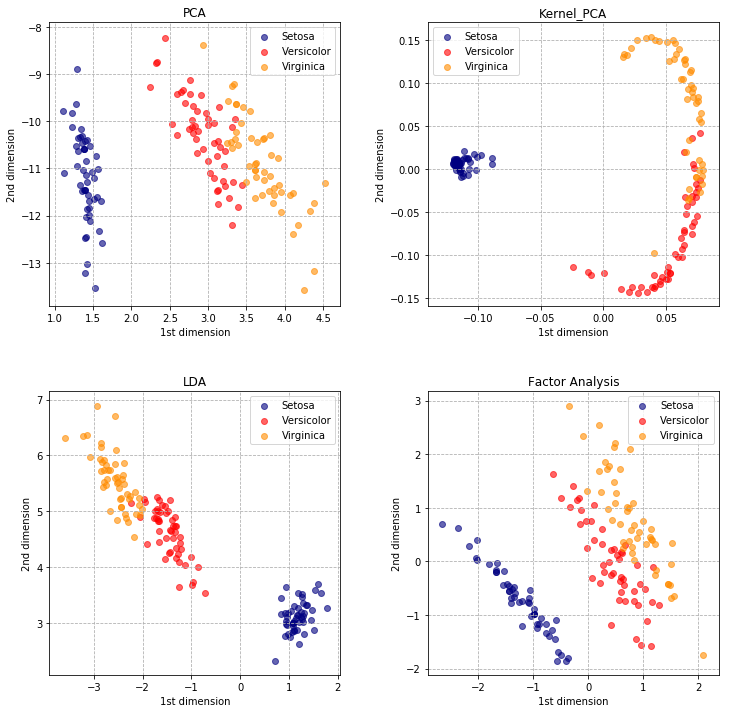

In [4]:
algs = collections.OrderedDict([("PCA", X_pca),
                                ("Kernel_PCA", X_kpca),
                                ("LDA", X_lda),
                                ("Factor Analysis", X_fa)])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12));
ax = ax.ravel()

for (alg_name, X_trans), iax in zip(algs.iteritems(), ax):
    iax.scatter(X_trans[y==0,0], X_trans[y==0,1], alpha=0.6, color="navy", label="Setosa");
    iax.scatter(X_trans[y==1,0], X_trans[y==1,1], alpha=0.6, color="red", label="Versicolor");
    iax.scatter(X_trans[y==2,0], X_trans[y==2,1], alpha=0.6, color="darkorange", label="Virginica");

    iax.set_title(alg_name);
    iax.set_xlabel("1st dimension");
    iax.set_ylabel("2nd dimension");
    iax.legend();
    iax.grid(linestyle="--");
    
fig.subplots_adjust(wspace=.3, hspace=.3)